In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import os
import re
import cv2

In [2]:
df = pd.read_csv('tracking.txt', sep = '\t')

In [3]:
X_centers = df[df.id == 0]['xBody'].values
y_centers = df[df.id == 0]['yBody'].values
img_numbers = df[df.id == 0]['imageNumber'].values

In [4]:
data = []
c1 = 0
for dirname, _, filenames in (os.walk('video')):
    for c, filename in enumerate(sorted(filenames, key=lambda x: int(re.sub('\D', '', x)))):
        fr = int(re.findall(r'\d+', filename)[0])
        if (fr in img_numbers):
            img = PIL.Image.open(os.path.join(dirname, filename)).convert('L')
            g = np.asarray(img)
            ind = np.where(img_numbers == fr)[0].item()
            X = int(X_centers[ind])
            Y = int(y_centers[ind])
            im = g[Y-45 : Y+45, X-45: X+45].astype(np.uint8)
            data.append(im)
            
data = np.array(data)

In [5]:

for d, n in zip(data, img_numbers):
    PIL.Image.fromarray(d).save('data2/frame' + str(n) + '.jpg')

In [6]:
#save data composed of 442 images of shape 90,90 into a mp4 file with 20 fps
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 20, (90,90), 0)
for i in range(len(data)):
    out.write(data[i])
out.release()





# No background

In [7]:
background = np.array(PIL.Image.open('background.pgm').convert('L'))
a = np.asarray(img)

In [82]:
data = []
c1 = 0
for dirname, _, filenames in (os.walk('video')):
    for c, filename in enumerate(sorted(filenames, key=lambda x: int(re.sub('\D', '', x)))):
        fr = int(re.findall(r'\d+', filename)[0])
        if (fr in img_numbers):
            img = PIL.Image.open(os.path.join(dirname, filename)).convert('L')
            g = (np.asarray(img) - background).astype(np.int8)
            ind = np.where(img_numbers == fr)[0].item()
            X = int(X_centers[ind])
            Y = int(y_centers[ind])
            im = g[Y-45 : Y+45, X-45: X+45].astype(np.int8)
            data.append(im)
            
data = np.array(data)

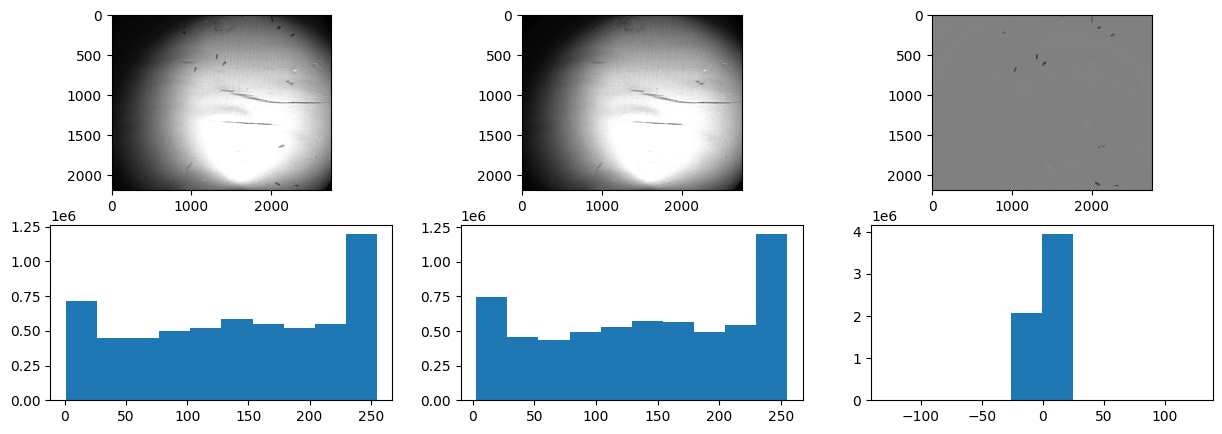

In [45]:
a = np.asarray(img)

d = np.clip(a - background, 0, 255).astype(np.int8)

#create subplot with 1,3
fig, ax = plt.subplots(2,3, figsize = (15,5))
ax[0,0].imshow(a, cmap = 'gray')
ax[0,1].imshow(background, cmap = 'gray')
ax[0,2].imshow(d, cmap = 'gray')
ax[1,0].hist(a.ravel())
ax[1,1].hist(background.ravel())
ax[1,2].hist(d.ravel())
plt.show()

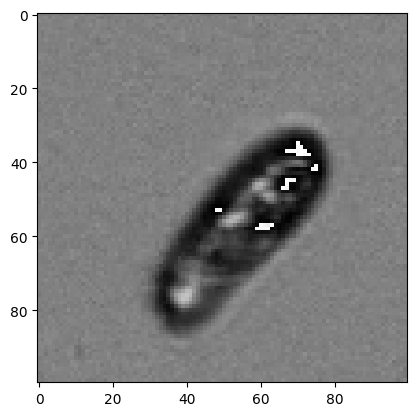

In [83]:
plt.imshow(d[550:650, 1350:1450], cmap='gray')

In [113]:
data[163].min()

-128

In [99]:
data[0].max()

113

(array([4.000e+00, 3.250e+02, 3.570e+02, 4.180e+02, 5.228e+03, 1.698e+03,
        3.000e+01, 1.500e+01, 1.300e+01, 1.200e+01]),
 array([ 21.,  43.,  65.,  87., 109., 131., 153., 175., 197., 219., 241.]),
 <BarContainer object of 10 artists>)

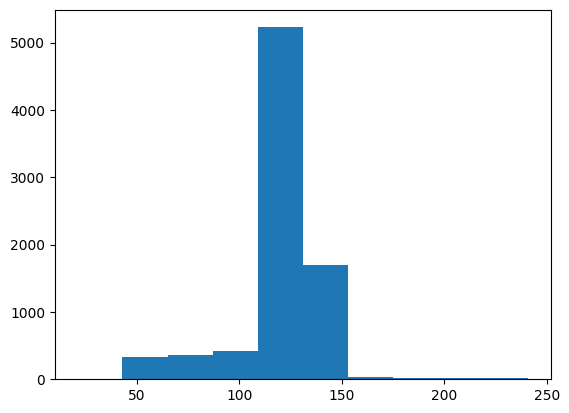

In [96]:
for i in range(len(data)):
    PIL.Image.fromarray(data[i] + data[i].max()).save('data/frame' + str(i) + '.jpg')

In [91]:
data = data.astype(np.int8)

In [110]:
for d, n in zip(data, img_numbers):
    PIL.Image.fromarray((d + 128).astype(np.uint8)).save('nobackground/frame' + str(n) + '.jpg')

In [87]:
for d, n in zip(data, img_numbers):
    PIL.Image.fromarray(d).save('nobackground/frame' + str(n) + '.jpg')

In [122]:
#save data composed of 442 images of shape 90,90 into a mp4 file with 20 fps
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output_nobackground.mp4', fourcc, 20, (90,90), 0)
for i in range(len(data)):
    out.write((data[i]+128).astype(np.uint8))
out.release()



